In [1]:
import cv2
import os
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from kmeans import  StandardKMeans2, mpKMeans,  allowKMeans2, chop as kchop
LOW_PREC = kchop(np.float16)

def sigificant_digit(number, digits=5):
    if number != 0:
        return round(number, digits - int(math.floor(math.log10(abs(number)))) - 1)
    else:
        return 0
    
files = ['ILSVRC2012_val_00000017.jpg', 
         'ILSVRC2012_val_00006582.jpg']

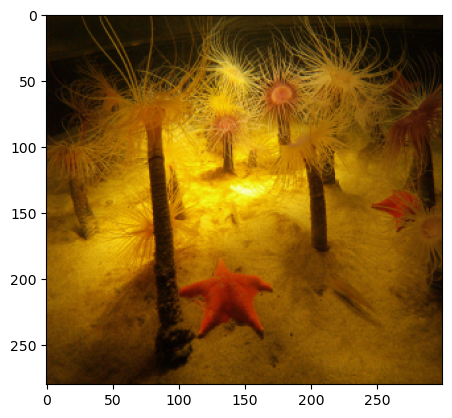

In [2]:
image=cv2.imread('data/Img/'+files[0])
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = cv2.resize(image, (300,280), interpolation = cv2.INTER_AREA)
plt.axis('on')
plt.imshow(img)
plt.show()

In [3]:
clusters = [5, 10, 20, 50]
figure_size = 10

def read_image(image, sizes=(200,180)):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, sizes, interpolation = cv2.INTER_AREA)
    vectorized = np.float64(img.reshape((-1,3)))

    vectorized = vectorized / 255.0
    return vectorized, img.shape

def reconstruct_img(kmeans, shape):
    kmeans_centers = np.uint8(kmeans.centers * 255.0)
    kmeans_res = kmeans_centers[kmeans.labels]
    kmeans_image = kmeans_res.reshape((shape))
    return kmeans_image


trigger: - - 81.726 \%;


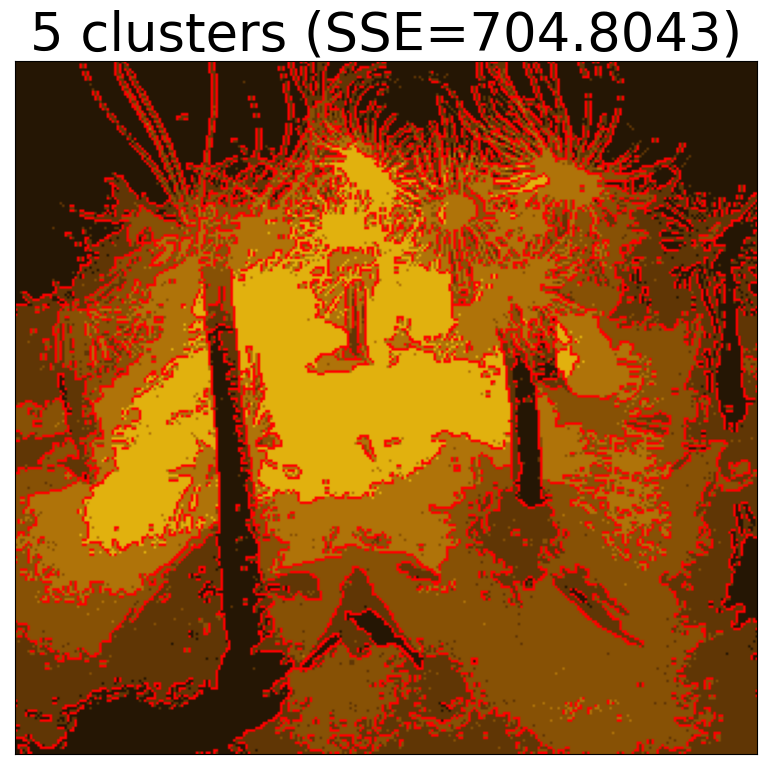

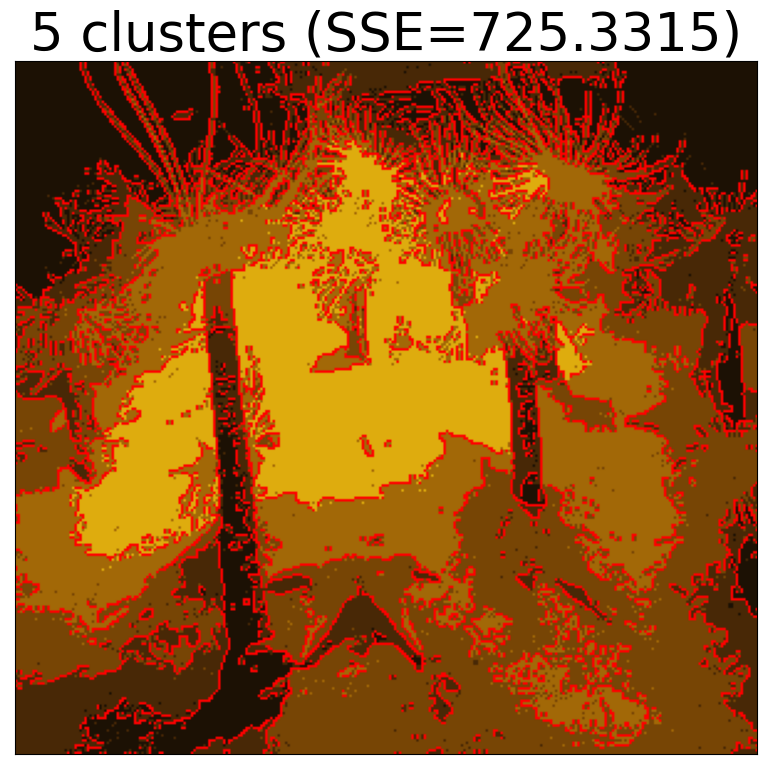

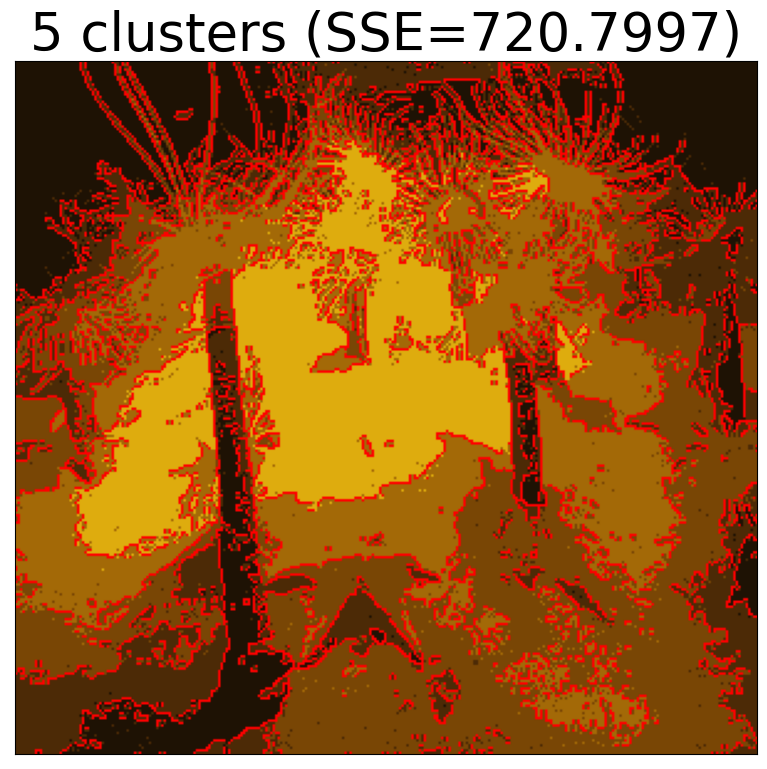

trigger: - - 80.587 \%;


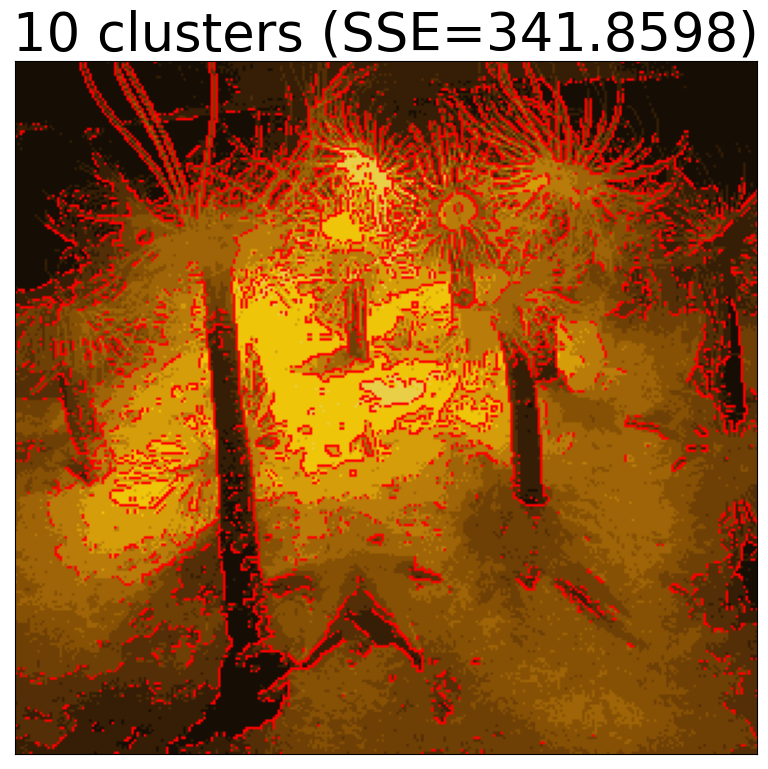

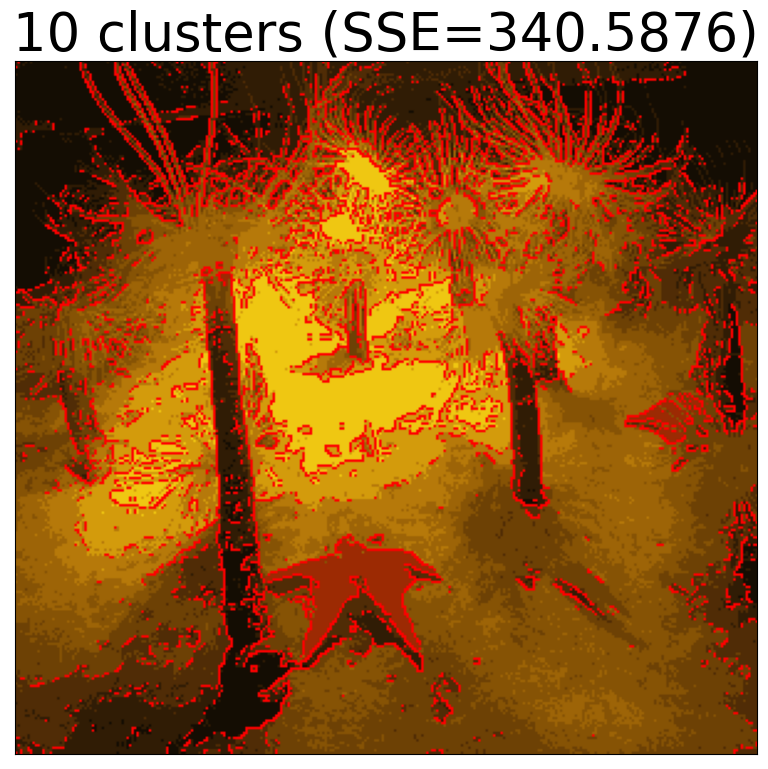

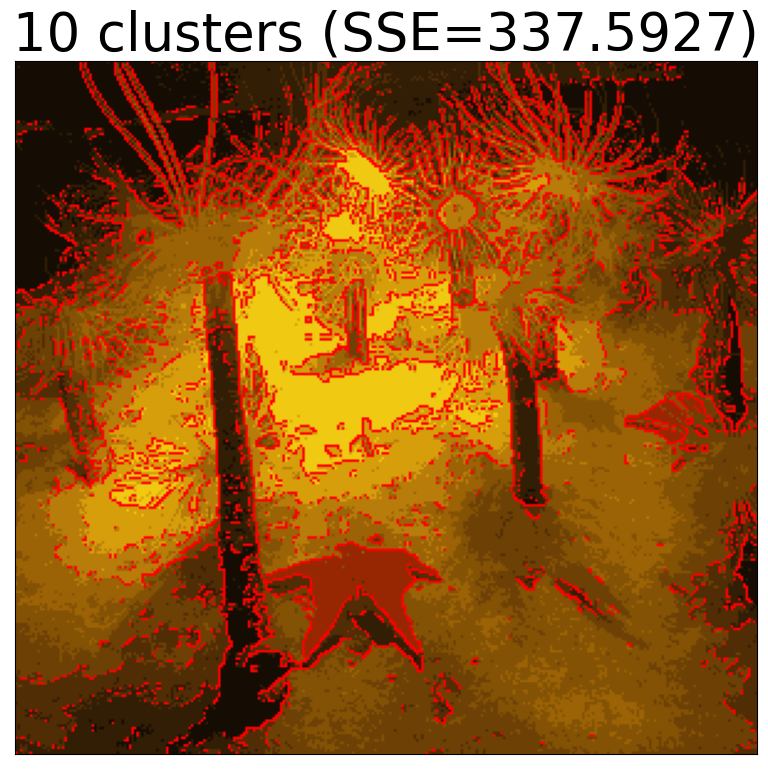

trigger: - - 80.042 \%;


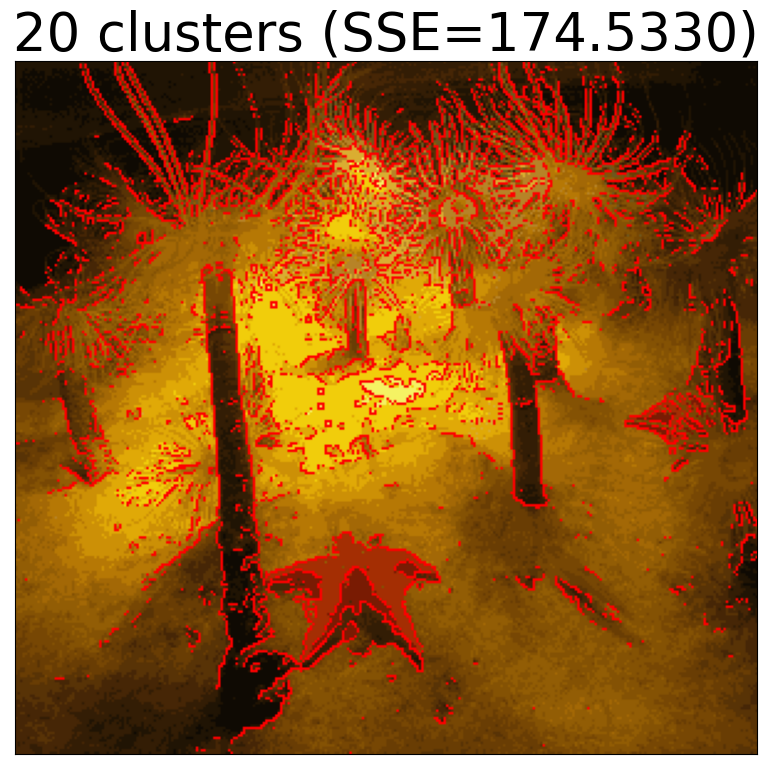

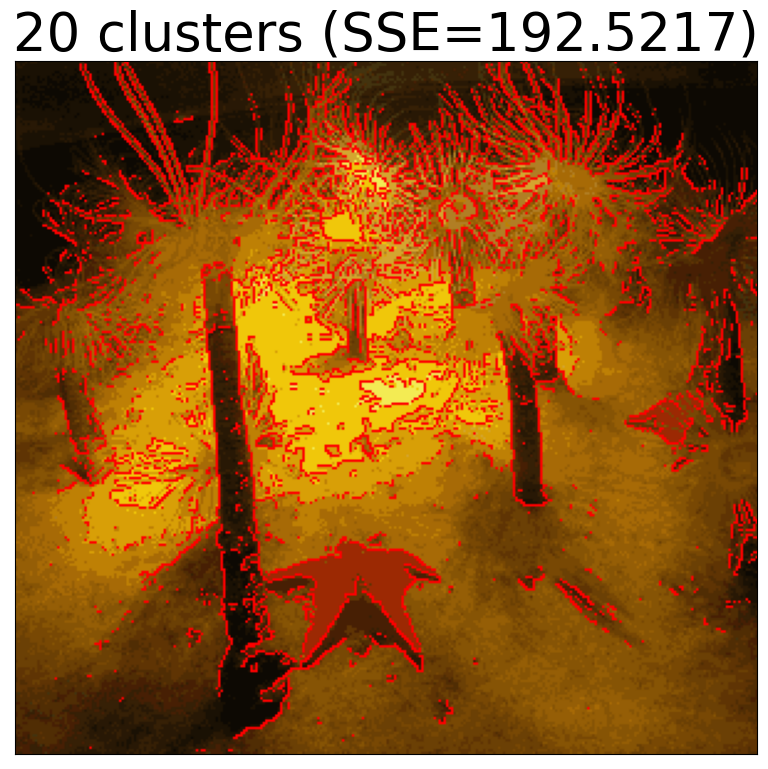

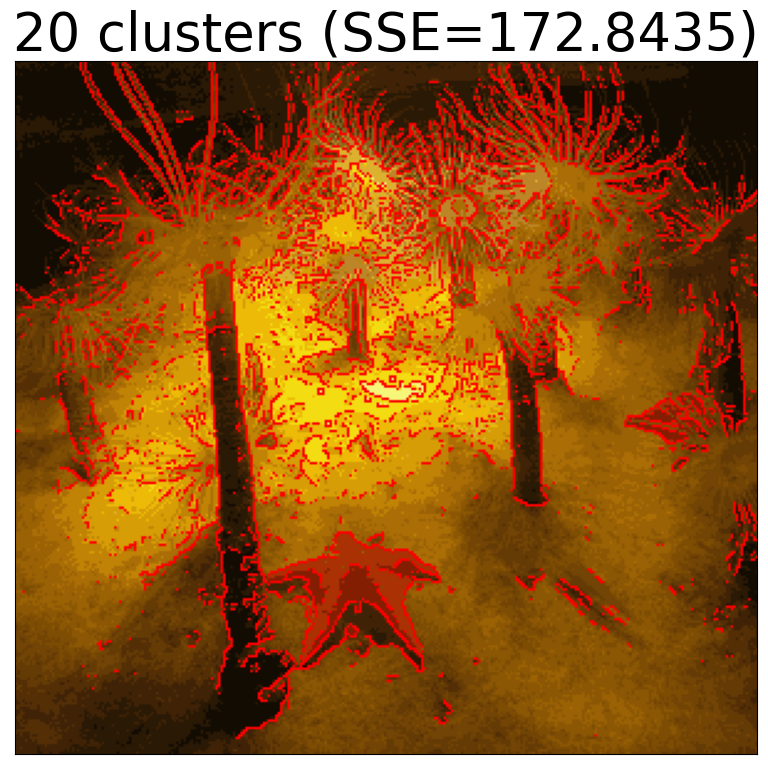

trigger: - - 81.174 \%;


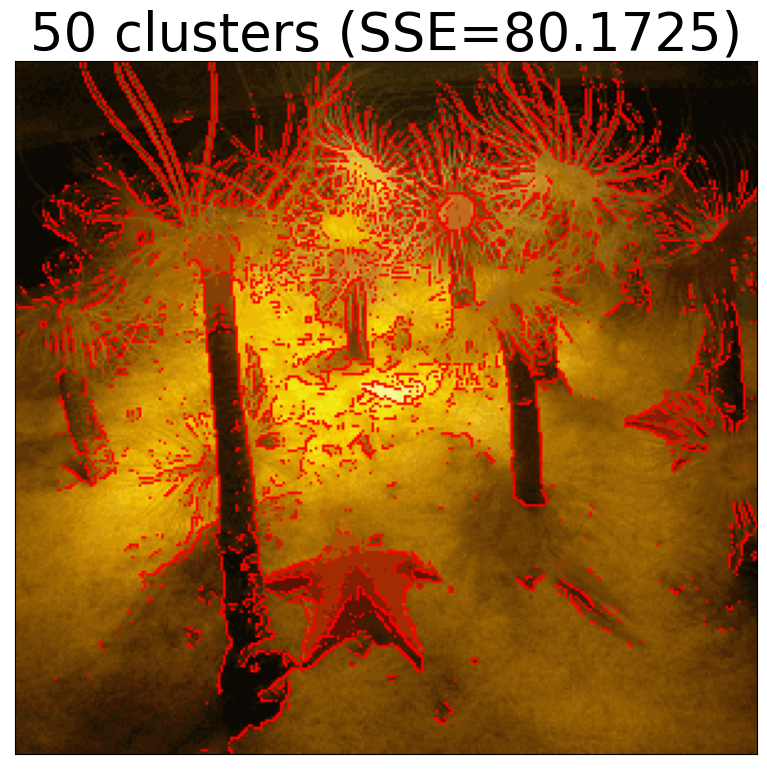

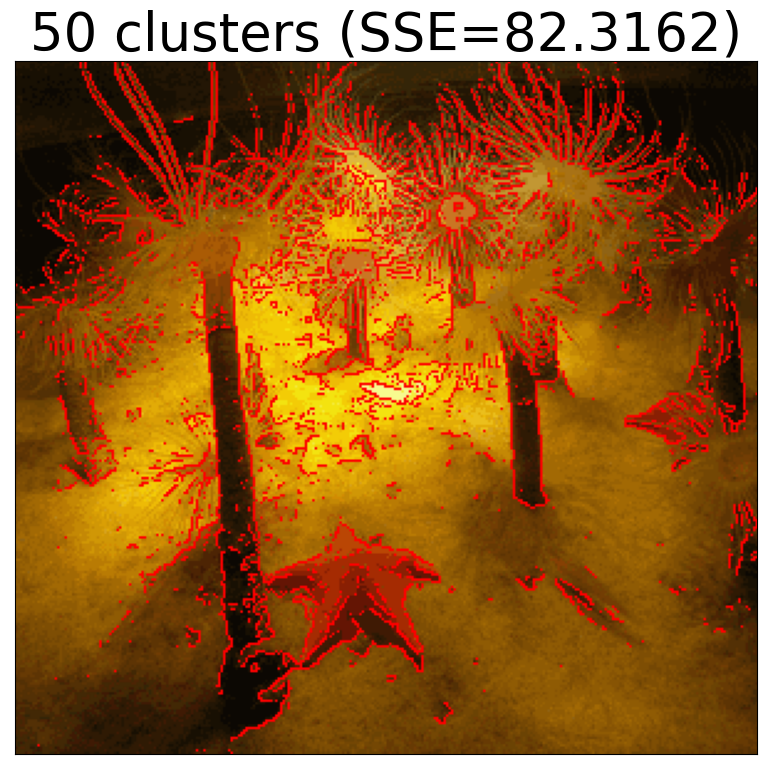

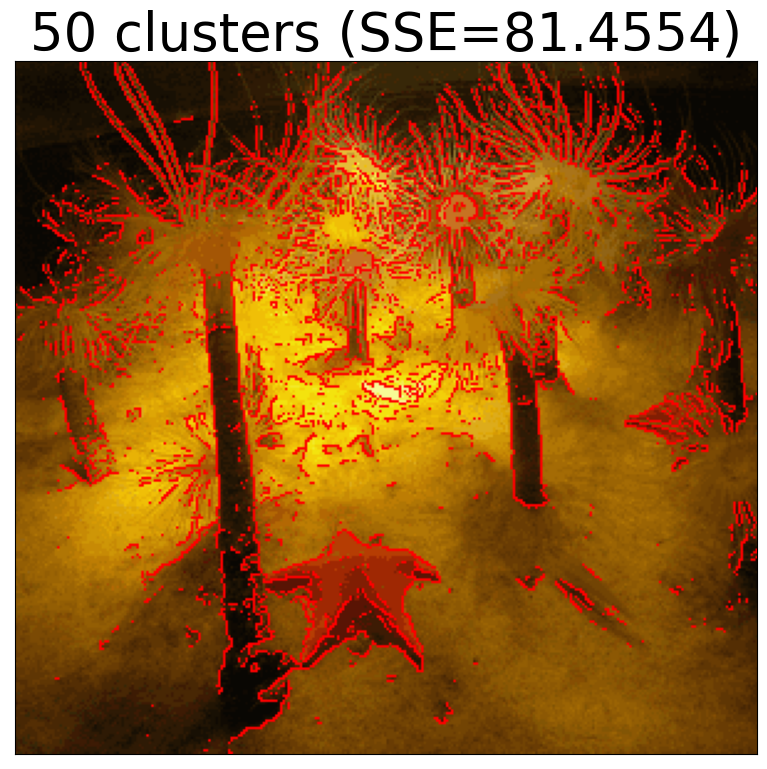

In [4]:
fontsize = 38
image = cv2.imread('data/Img/'+files[0])

vectorized, shape = read_image(image, sizes=(300,280))
for i in range(len(clusters)):
    kmeans = StandardKMeans2(n_clusters=clusters[i], seeding='d2')
    kmeans.fit(vectorized)
    
    alkmeans = allowKMeans2(n_clusters=clusters[i], seeding='d2', low_prec=LOW_PREC, verbose=0)
    alkmeans.fit(vectorized)
    
    mpkmeans = mpKMeans(n_clusters=clusters[i], seeding='d2', low_prec=LOW_PREC, verbose=0)
    mpkmeans.fit(vectorized)
    
    print("trigger:", '-', '-', sigificant_digit(mpkmeans.low_prec_trigger * 100),"\%;")
    
    ## kmeans
    plt.figure(figsize=(figure_size, figure_size-1))
    kmeans_image = reconstruct_img(kmeans, shape)
    edges = cv2.Canny(kmeans_image, 150,150)
    kmeans_image[edges == 255] = [255, 0, 0]
    plt.title('{0:d} clusters (SSE={1:3.4f})'.format(len(set(kmeans.labels)), kmeans.inertia[-1]), fontsize=fontsize)
    plt.xticks([]), plt.yticks([])
    plt.imshow(kmeans_image)
    plt.savefig('results/segmentation/seg'+str(clusters[i])+'1.pdf', bbox_inches='tight')
    plt.show()
    
    ## all low kmeans
    plt.figure(figsize=(figure_size, figure_size-1))
    alkmeans_image = reconstruct_img(alkmeans, shape)
    edges = cv2.Canny(alkmeans_image, 150,150)
    alkmeans_image[edges == 255] = [255, 0, 0]
    plt.title('{0:d} clusters (SSE={1:3.4f})'.format(len(set(alkmeans.labels)), alkmeans.inertia[-1]), fontsize=fontsize)
    plt.xticks([]), plt.yticks([])
    plt.imshow(alkmeans_image)
    plt.savefig('results/segmentation/seg_al'+str(clusters[i])+'1.pdf', bbox_inches='tight')
    plt.show()
    
    ## mp kmeans
    plt.figure(figsize=(figure_size, figure_size-1))
    mpkmeans_image = reconstruct_img(mpkmeans, shape)
    edges = cv2.Canny(mpkmeans_image, 150,150)
    mpkmeans_image[edges == 255] = [255, 0, 0]
    plt.title('{0:d} clusters (SSE={1:3.4f})'.format(len(set(mpkmeans.labels)), mpkmeans.inertia[-1]), fontsize=fontsize)
    plt.xticks([]), plt.yticks([])
    plt.imshow(mpkmeans_image)
    plt.savefig('results/segmentation/seg_mp'+str(clusters[i])+'1.pdf', bbox_inches='tight')
    plt.show()